## Машинное обучение, ВМК МГУ

## Практическое задание 3

### Общая информация
Дата выдачи: 14.11.2018

Мягкий дедлайн: 23:59MSK 21.11.2018

Жесткий дедлайн: 23:59MSK 23.11.2018

Выполнил: **Попов Дмитрий, группа 317**

### О задании

Задание состоит из двух частей: в **первой** части вы научитесь применять готовые модели из `sklearn` на данных и исследуете особенности разных видов регуляризации; во **второй** части вы реализуете собственный класс линейной регрессии для нестандартной функции потерь (включая процесс обучения) и исследуете скорость сходимости различных градиентных методов для этой модели.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Присылать необходимо ноутбук с выполненным заданием. Часть задания сдаётся в Яндекс.Контест. 

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 10

In [1]:
import pandas as pd

In [11]:
df=pd.read_csv('./data/homework-practice-03-data.csv')


In [15]:
print(df.shape)
df.head()

(244, 7)


,f0,f1,f2,f3,f4,f5,f6
0,16.99,1.01,0.976270,-3.697815,0.623295,0.524760,7199.992000
1,10.34,1.66,4.303787,7.715073,0.886961,0.473862,2466.136700
2,21.01,3.50,2.055268,-6.464284,0.618826,1.657394,2969.369100
3,23.68,3.31,0.897664,1.335254,0.133461,1.234554,1040.665300
4,24.59,3.61,-1.526904,-0.196414,0.980580,3.086397,37.469975


## Линейная регрессия из коробки

#### 1. [0.5 балла] Разбейте выборку, загруженную в ячейке выше в переменную `df`, на обучающую и тестовую части в соотношении 8:2.

In [66]:
# your code here
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [67]:
print(train.shape, test.shape)

(195, 7) (49, 7)


#### 2. [0.5 балла] В качестве целевой переменной для задачи регрессии будем использовать значения признака f1. Обучите, а затем провалидируйте на тестовых данных  следующие модели, используя в качестве метрики качества $R^2$:
* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) (линейная регрессия с $L1$-регуляризатором) с коэффициентом регуляризации, равным 0.01.

Не забудьте отмасштабировать данные перед обучением моделей!

In [105]:
# your code here
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

mm_scaler = MinMaxScaler()

x_train = train.loc[:, train.columns != 'f1']
y_train = train['f1']
x_test = test.loc[:, test.columns != 'f1']
y_test = test['f1']

sx_train = mm_scaler.fit_transform(x_train)
sx_test = mm_scaler.fit_transform(x_test)

In [106]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.pipeline import Pipeline

linreg = LinearRegression().fit(x_train, y_train)
lassoreg = Lasso(alpha=0.1).fit(x_train, y_train)

slinreg = LinearRegression().fit(sx_train, y_train)
slassoreg = Lasso(alpha=0.1).fit(sx_train, y_train)

In [107]:
print(linreg.score(x_test, y_test))
print(slinreg.score(sx_test, y_test))
print(lassoreg.score(x_test, y_test))
print(slassoreg.score(sx_test, y_test))

0.4637163771861469
0.3765818951952896
0.4761160049958883
0.40538836076661744


Я тут пообучал модели на разных переразбитиях и получил **крайне** неустойчивые результаты - score гулял от отрицательных значений до 0.6. Поэтому эти данные мало что могут сказать. Единственное, что можно - лассо всегда работало лучше обычной линейной, но это почти всегда ожидается. Я взял текущее разбиение, так как качество не слишком плохое и мало отличается у обычной линейной регрессии и лассо.

#### 3. [1 балл] Изучите значения параметров получившихся моделей и сравните количество строго нулевых весов в них.

In [108]:
# your code here
print(slinreg.coef_)
print(slassoreg.coef_)

[ 4.78731496 -0.00907202 -0.17818547  0.16068787  1.21447095  0.60729366]
[ 2.23864304  0.         -0.          0.          0.          0.        ]


In [109]:
# your code here

ztrain, ztest = train_test_split(df, test_size=0.2)

zy_train = ztrain['f1']
zy_test = ztest['f1']

zx_train = mm_scaler.fit_transform(ztrain.loc[:, ztrain.columns != 'f1'])
zx_test = mm_scaler.fit_transform(ztest.loc[:, ztest.columns != 'f1'])

zlinreg = LinearRegression().fit(zx_train, zy_train)
zlassoreg = Lasso(alpha=0.1).fit(zx_train, zy_train)

print(zlinreg.score(zx_test, zy_test))
print(zlassoreg.score(zx_test, zy_test))

print(zlinreg.coef_)
print(zlassoreg.coef_)

0.44439970927758543
0.27035404022807497
[4.82760723 0.16525197 0.01763589 0.06284275 0.15195009 0.20927902]
[ 1.85709828  0.         -0.          0.          0.          0.        ]


По крайней мере это стабильно - лассо зануляет все веса, кроме первого, сколько бы я раз ни переразбивал выборку.

#### 4. [1 балл] Нарисуйте попарные scatter plot для всех признаков в исходных данных (включая f1). Можно ли что-то сказать о связи признаков, веса которых были занулены методом Lasso, с целевой переменной?

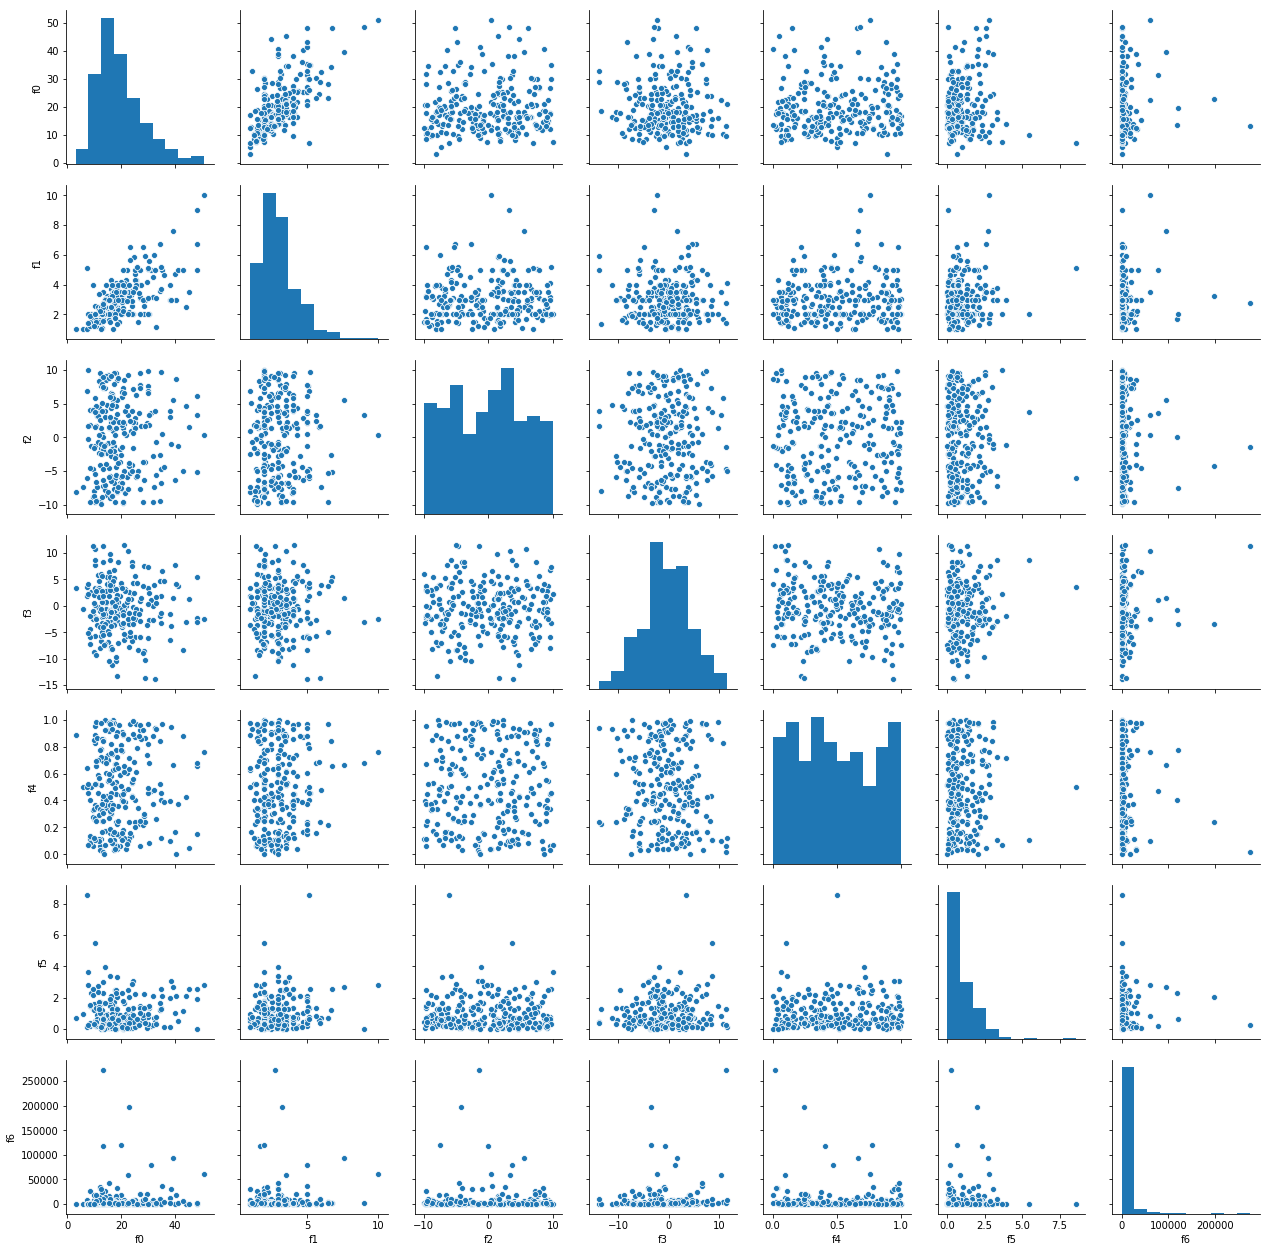

In [262]:
import seaborn as sns
sns.pairplot(df)

У f0 и f1 заметна линейная связь, остальные же признаки кажутся вообще шумом.

## Реализация градиентного спуска

#### 5. [4 балла] Реализуйте модель линейной регрессии для функции потерь Huber loss, обучаемую градиентным спуском:

$$
L_\delta(a,y)=
\begin{cases}
 \frac{1}{2}(y - a)^2,                   & |y - a| \le \delta, \\
 \delta\, |y - a| - \frac{1}{2}\delta^2 & \textrm{иначе.}
\end{cases}
$$

Все вычисления должны быть векторизованы, циклы средствами python допускается использовать только для итераций градиентного спуска. В качестве критерия останова необходимо использовать (одновременно):

* проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$, задаваемого параметром `tolerance`);
* достижение максимального числа итераций (например, 10000, задаваемого параметром `max_iter`).

Необходимо реализовать метод полного и стохастического градиентных спусков, а также поддержать метод momentum при помощи параметра `alpha` (способ оценивания градиента должен задаваться при помощи параметра `gd_type`).

Чтобы проследить, что оптимизационный процесс действительно сходится, будем использовать атрибут класса `loss_history` — в нём после вызова метода `fit` должны содержаться значения функции потерь для всех итераций, начиная с первой (до совершения первого шага по антиградиенту).

Инициализировать веса можно случайным образом или нулевым вектором. Ниже приведён шаблон класса, который должен содержать код реализации модели.

__Python-файл с реализованным классом необходимо сдать на проверку в [Яндекс.Контест](https://contest.yandex.ru/contest/9247/)__

Укажите ссылку на посылку (run-report): https://contest.yandex.ru/contest/9247/run-report/16019847/

In [250]:
from sklearn.base import BaseEstimator
from sklearn.metrics import r2_score
import numpy as np


class HuberReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='stochastic',
                 tolerance=1e-6, max_iter=10000, w0=None, alpha=1e-3, eta=1e-2):
        """
        gd_type: 'full' or 'stochastic'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        eta: learning rate
        alpha: momentum coefficient
        """
        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None  # list of loss function values at each training iteration

    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        if self.w0 is None:
            self.w = np.random.random(X.shape[1])
        else:
            self.w = self.w0
        self.loss_history = [self.calc_loss(X, y)]
        w_delta = np.zeros_like(self.w)

        if self.gd_type == 'full':
            for i in range(self.max_iter):
                w_delta = w_delta * self.alpha - self.eta * self.calc_gradient(X, y)
                self.w += w_delta
                self.loss_history.append(self.calc_loss(X, y))
                if np.linalg.norm(w_delta) < self.tolerance:
                    break
        else:
            from random import randint
            for i in range(self.max_iter):
                j = randint(0, X.shape[0] - 1)
                w_delta = - self.eta * self.calc_gradient(X[j][None,:], np.asarray(y[j]))
                self.w += w_delta
                self.loss_history.append(self.calc_loss(X, y))
                if np.linalg.norm(w_delta) < self.tolerance:
                    break

        return self

    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')

        return np.matmul(X, self.w)

    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        G = np.matmul(X, self.w) - y
        greater = np.where(abs(G) > self.delta)

        G[greater] = np.sign(G[greater]) * self.delta
        return np.matmul(X.transpose(), G) / X.shape[0]

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float
        """
        if self.w is None:
            raise Exception('Not trained yet')

        L = np.abs(np.matmul(X, self.w) - y)
        less = np.where(L <= self.delta)
        greater = np.where(L > self.delta)

        L[less] = L[less] ** 2 / 2
        L[greater] = L[greater] * self.delta - self.delta ** 2 / 2

        return L.sum() / X.shape[0]
    
    def score(self, X, y):
        return r2_score(y, self.predict(X))


#### 6. [1.5 балла] Обучите и провалидируйте модель на тех же данных, сравните качество с предыдущими методами. Исследуйте влияние параметров `max_iter` и `alpha` на процесс оптимизации. Согласуется ли оно с вашими ожиданиями?

In [279]:
np_x_train = np.concatenate([np.asarray(x_train), np.zeros((x_train.shape[0], 1)) + 1], axis=1)
np_sx_train = np.concatenate([np.asarray(sx_train), np.zeros((sx_train.shape[0], 1)) + 1], axis=1)
np_y_train = np.asarray(y_train)
np_x_test = np.concatenate([np.asarray(x_test), np.zeros((x_test.shape[0], 1)) + 1], axis=1)
np_sx_test = np.concatenate([np.asarray(sx_test), np.zeros((sx_test.shape[0], 1)) + 1], axis=1)
np_y_test = np.asarray(y_test)

In [280]:
# your code here
huber_full_m = HuberReg(gd_type='full').fit(np_sx_train, np_y_train)

In [281]:
huber_full_nom = HuberReg(gd_type='full', alpha=0).fit(np_sx_train, np_y_train)

In [282]:
huber_s = HuberReg().fit(np_sx_train, np_y_train)

In [283]:
print(huber_full_m.loss_history[:5])
print(huber_full_m.loss_history[-5:])
print(huber_full_m.score(np_sx_test, np_y_test))

[1.110842937173847, 1.1006839493609568, 1.090680206278975, 1.080841002551282, 1.071165565409544]
[0.41502755762004545, 0.4150260484091017, 0.41502453977620873, 0.41502303172113436, 0.4150215242436458]
0.442281759343779


In [284]:
print(huber_full_nom.loss_history[:5])
print(huber_full_nom.loss_history[-5:])
print(huber_full_nom.score(np_sx_test, np_y_test))

[1.3295533634506864, 1.3168196337097344, 1.3042662313387636, 1.2918923572657195, 1.279695865615554]
[0.4164441282174826, 0.4164422563643572, 0.4164403851938391, 0.4164385147056631, 0.416436644899564]
0.4442682159480582


In [285]:
print(huber_s.loss_history[:5])
print(huber_s.loss_history[-5:])
print(huber_s.score(np_sx_test, np_y_test))

[1.6708901599445938, 1.6563160563900863, 1.6386494961336608, 1.6236893564299506, 1.614152350117642]
[0.4251808023100273, 0.4274240239922838, 0.4261160232351071, 0.4243213994684941, 0.42331300765388746]
0.47557762701704676


Я добавил единичный вектор-столбец к данным, чтобы модель могла настроиться на сдвиг, как было проинструктировано преподавателем. Это действительно подняло точность с ~0.36 до 0.44 - 0.47. Но это всё равно хуже, чем Лассо на неотмасштабированных данных...

In [334]:
alphas = [10 ** (i / 2) for i in range(-12, 0)]
scores_a = []
loss_a = []

for alpha in alphas:
    est = HuberReg(gd_type='full', alpha=alpha, max_iter=50000).fit(np_sx_train, np_y_train)
    scores_a.append(est.score(np_sx_test, np_y_test))
    loss_a.append(est.loss_history[-1])

In [335]:
print(scores_a)
print(loss_a)

[0.39604065324609117, 0.39606202557626025, 0.39602556926346666, 0.39596094452475084, 0.39616306122537104, 0.3958684093673679, 0.39640044269050323, 0.39622052868575175, 0.39629360325050944, 0.39616835809808937, 0.3961053890825781, 0.3960352482799414]
[0.4109992401314872, 0.41099904642103513, 0.4109987949022362, 0.4109987614592813, 0.4110003175944473, 0.41099877184104505, 0.4110010600240527, 0.41100112116373155, 0.41100013200080804, 0.4109987662689335, 0.4109986951751482, 0.4109984953021279]


In [324]:
max_iters = [10 ** i for i in range(1, 9)]
scores_i = []
loss_i = []

for max_iter in max_iters:
    est = HuberReg(gd_type='full',max_iter=max_iter).fit(np_sx_train, np_y_train)
    scores_i.append(est.score(np_sx_test, np_y_test))
    loss_i.append(est.loss_history[-1])

In [325]:
print(scores_i)
print(loss_i)

[-0.9097667411220922, -0.08056757513296597, 0.2256385802153742, 0.434228942121784, 0.3959597178852272, 0.39590358958408833, 0.39610005052721886, 0.395952540763731]
[0.9140991435990533, 0.6445982318275263, 0.5454887825191622, 0.41549197755500744, 0.41099880171574565, 0.41099877643592764, 0.41099880525919574, 0.4109988008724377]


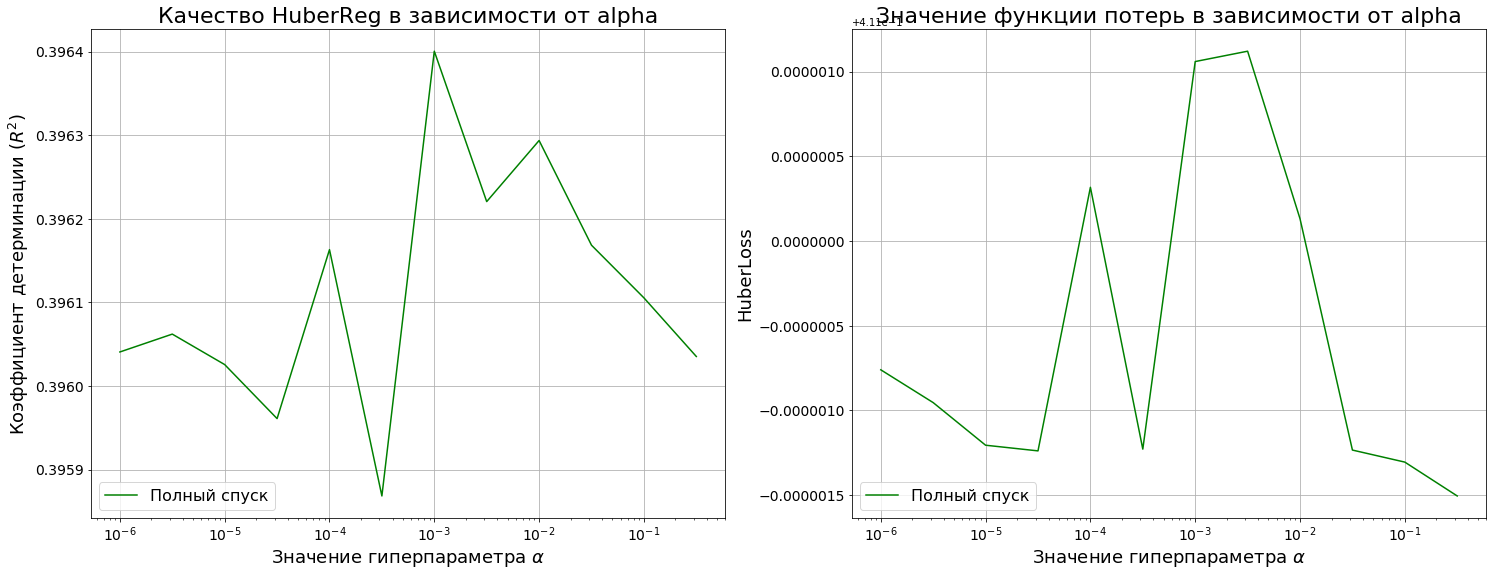

In [358]:
plt.subplots(1, 2, figsize=(25, 9))

plt.subplot(1, 2, 1)
plt.title(r'Качество HuberReg в зависимости от alpha', fontsize=22)
plt.semilogx(alphas, scores_a, 'g', label='Полный спуск')
plt.xlabel(r'Значение гиперпараметра $\alpha$', fontsize=18)
plt.ylabel(r'Коэффициент детерминации ($R^2$)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower left', prop={'size': 16})
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title(r'Значение функции потерь в зависимости от alpha', fontsize=22)
plt.semilogx(alphas, loss_a, 'g', label='Полный спуск')
plt.xlabel(r'Значение гиперпараметра $\alpha$', fontsize=18)
plt.ylabel(r'HuberLoss', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower left', prop={'size': 16})
plt.grid(True)

plt.show()

Сначала я подумал, что всё плохо и неправильно, но потом понял, что отличия в этих графиках в десятитысячных и меньше долях. Я поставил большее количество итераций, чтобы спуск заведомо сходился, и, судя по этим графикам, значение альфа в таком случае почти не влияет на качество получаемой модели. Это соответствует моей интуиции. То, что функция потерь больше в тех же местах, где больше качество - не соответствует, я не знаю, почему так. Локальные колебания вызваны либо инициализацией начальных весов случайными значениями либо недоступностью локального минимума при определённых значениях инерции.

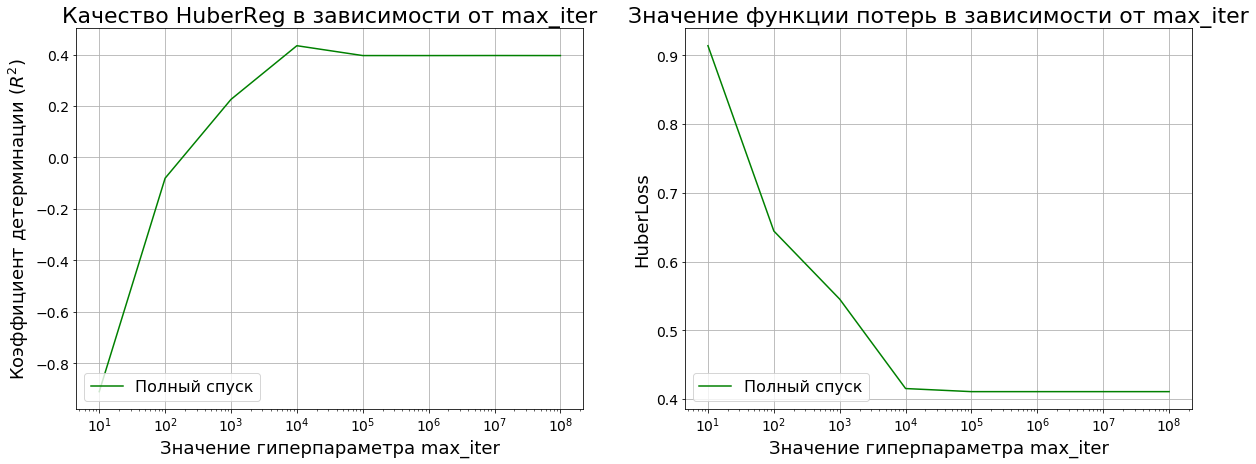

In [346]:
plt.subplots(1, 2, figsize=(20, 7))

plt.subplot(1, 2, 1)
plt.title(r'Качество HuberReg в зависимости от max_iter', fontsize=22)
plt.semilogx(max_iters, scores_i, 'g', label='Полный спуск')
plt.xlabel(r'Значение гиперпараметра max_iter', fontsize=18)
plt.ylabel(r'Коэффициент детерминации ($R^2$)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower left', prop={'size': 16})
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title(r'Значение функции потерь в зависимости от max_iter', fontsize=22)
plt.semilogx(max_iters, loss_i, 'g', label='Полный спуск')
plt.xlabel(r'Значение гиперпараметра max_iter', fontsize=18)
plt.ylabel(r'HuberLoss', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='lower left', prop={'size': 16})
plt.grid(True)

plt.show()

Ну, это хотя бы ожидаемо. Здесь можно видеть, что качество обучения зависит от количества итераций, пока оно достаточно мало, потом качество и значение лосс-функции выходят на плато - когда количества итераций становится достаточно для достижения минимума.

#### 7. [1.5 балла] Постройте графики (на одной и той же картинке) зависимости величины функции потерь от номера итерации для полного, стохастического градиентного спусков, а также для полного градиентного спуска с методом инерции. Сделайте выводы о скорости сходимости различных модификаций градиентного спуска.

Не забывайте о том, что должны из себя представлять *красивые* графики!

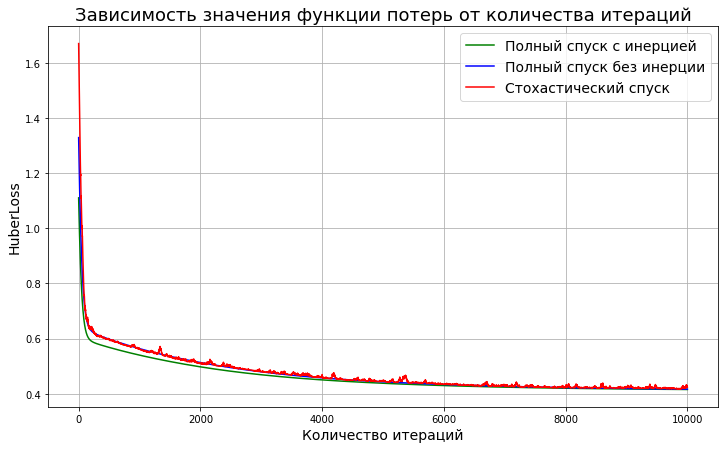

In [352]:
# your code here
plt.figure(figsize=(12, 7))
plt.title('Зависимость значения функции потерь от количества итераций', fontsize=18)
plt.plot(range(0, 10001), huber_full_m.loss_history, 'g', label='Полный спуск с инерцией')
plt.plot(range(0, 10001), huber_full_nom.loss_history, 'b', label='Полный спуск без инерции')
plt.plot(range(0, 10001), huber_s.loss_history, 'r', label='Стохастический спуск')
plt.xlabel(r'Количество итераций', fontsize=14)
plt.ylabel(r'HuberLoss', fontsize=14)
plt.legend(loc='upper right', prop={'size': 14})
plt.grid(True)
plt.show()

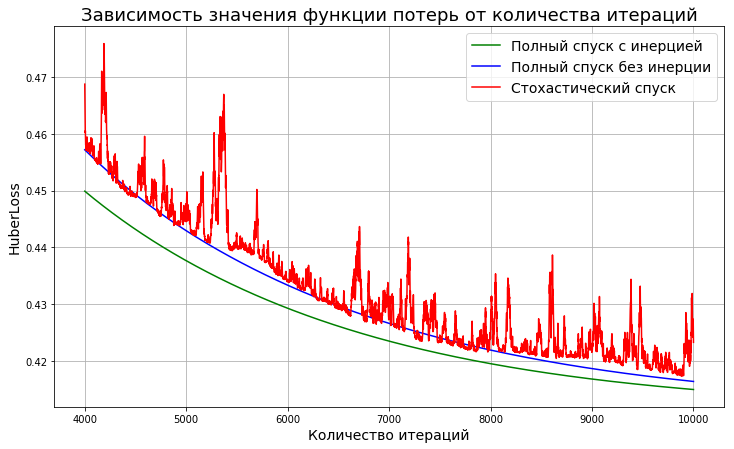

In [353]:
# your code here
plt.figure(figsize=(12, 7))
plt.title('Зависимость значения функции потерь от количества итераций', fontsize=18)
plt.plot(range(4000, 10001), huber_full_m.loss_history[4000:], 'g', label='Полный спуск с инерцией')
plt.plot(range(4000, 10001), huber_full_nom.loss_history[4000:], 'b', label='Полный спуск без инерции')
plt.plot(range(4000, 10001), huber_s.loss_history[4000:], 'r', label='Стохастический спуск')
plt.xlabel(r'Количество итераций', fontsize=14)
plt.ylabel(r'HuberLoss', fontsize=14)
plt.legend(loc='upper right', prop={'size': 14})
plt.grid(True)
plt.show()

Я сделал второй график со срезкой множества итераций, потому что на первом почти ничего не видно из-за начального хвоста. Итак, полный спуск с инерцией доминирует - он позволяет быстрее сойтись к минимуму при ограниченном количестве итераций. Думаю, это означает, что линии уровня функции сильно сжаты в направлении единственного значимого признака - наверное, так и должно быть при шумовых данных. Инерция позволяет меньше колебаться по такому сжатому гиперэллипсоиду и быстрее добраться до его центра. Стохастический спуск здесь проигрывает, но это и неудивительно - вообще-то, сравнивать его с другими надо не по количеству итераций, а по количеству эпох - проходов по всем объектам выборки. В данном случае ему нужно в 195 раз больше итераций, чтобы их результаты были сравнимы. Учитывая это, качество его работы даже удивительно - а ведь его график иногда пересекает график полного спуска без инерции. Но до полного с инерцией, который избегает проблемы колебания, ему далеко.

Сильные колебания стохастического спуска ожидаемы - он же стохастический. В запрошенной реализации скорость обучения постоянна, поэтому он, вообще говоря, не сходится - даже в конце видны сильные колебания. Для сходимости его необходимо убывание скорости обучения (параметр eta).